<a href="https://colab.research.google.com/github/harishmudaliar/Future_DS_03/blob/main/Future_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install textblob vaderSentiment wordcloud

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [25]:
import numpy as np

# Set seed for reproducibility (optional)
np.random.seed(42)

# Add Rating column with values between 1 and 5
df['Rating'] = np.random.randint(1, 6, size=len(df))

df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,TextBlob_Polarity,Sentiment,Rating
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.2,Positive,4
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,5
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.5,Positive,3
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1.0,Positive,5
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,5


In [26]:
def assign_rating(polarity):
    if polarity > 0.5:
        return 5
    elif polarity > 0.2:
        return 4
    elif polarity > -0.1:
        return 3
    elif polarity > -0.4:
        return 2
    else:
        return 1

df['Rating'] = df['TextBlob_Polarity'].apply(assign_rating)

df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,TextBlob_Polarity,Sentiment,Rating
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.2,Positive,3
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,3
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.5,Positive,4
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1.0,Positive,5
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,3


In [27]:
ratings = [5,4,3,2,1]
df['Rating'] = [ratings[i % 5] for i in range(len(df))]


In [28]:
df['Rating'].value_counts()


,count
Rating,
5,116
4,116
3,116
2,116
1,116


In [33]:
import random

random.seed(42)

# Define a list of sample feedback comments
feedback_samples = [
    "Excellent course content and delivery.",
    "The instructor was very engaging and knowledgeable.",
    "I found some parts difficult to understand.",
    "Good pace, but could use more examples.",
    "Very helpful and clear explanations.",
    "Needs improvement in practical application.",
    "Satisfied with the overall experience.",
    "Not very interactive."
]

df['Feedback'] = [random.choice(feedback_samples) for _ in range(len(df))]

df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,TextBlob_Polarity,Sentiment,Rating,Feedback
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.2,Positive,5,The instructor was very engaging and knowledge...
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,4,Excellent course content and delivery.
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.5,Positive,3,Very helpful and clear explanations.
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1.0,Positive,2,"Good pace, but could use more examples."
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,1,"Good pace, but could use more examples."


In [34]:
df[['Rating', 'Feedback']].head(10)


,Rating,Feedback
0,5,The instructor was very engaging and knowledge...
1,4,Excellent course content and delivery.
2,3,Very helpful and clear explanations.
3,2,"Good pace, but could use more examples."
4,1,"Good pace, but could use more examples."
5,5,I found some parts difficult to understand.
6,4,The instructor was very engaging and knowledge...
7,3,The instructor was very engaging and knowledge...
8,2,Satisfied with the overall experience.
9,1,Excellent course content and delivery.


In [35]:
# Show data info
df.info()

# Drop rows where feedback is missing
df = df.dropna(subset=['Feedback'])

# Fill missing ratings with average
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SN                    580 non-null    int64  
 1   Total Feedback Given  580 non-null    int64  
 2   Total Configured      580 non-null    int64  
 3   Questions             580 non-null    object 
 4   Weightage 1           580 non-null    int64  
 5   Weightage 2           580 non-null    int64  
 6   Weightage 3           580 non-null    int64  
 7   Weightage 4           580 non-null    int64  
 8   Weightage 5           580 non-null    int64  
 9   Average/ Percentage   580 non-null    object 
 10  Course Name           580 non-null    object 
 11  Basic Course          580 non-null    object 
 12  TextBlob_Polarity     580 non-null    float64
 13  Sentiment             580 non-null    object 
 14  Rating                580 non-null    int64  
 15  Feedback              5

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,TextBlob_Polarity,Sentiment,Rating,Feedback
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.2,Positive,5,The instructor was very engaging and knowledge...
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,4,Excellent course content and delivery.
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.5,Positive,3,Very helpful and clear explanations.
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1.0,Positive,2,"Good pace, but could use more examples."
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.0,Neutral,1,"Good pace, but could use more examples."


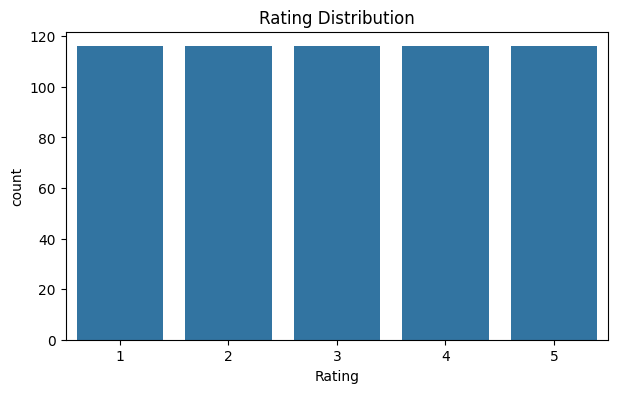

Average Rating: 3.0


In [36]:
plt.figure(figsize=(7,4))
sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.show()

print("Average Rating:", df['Rating'].mean())


In [39]:
def get_sentiment_textblob(text):
    return TextBlob(text).sentiment.polarity

df['TextBlob_Polarity'] = df['Feedback'].apply(get_sentiment_textblob)
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,TextBlob_Polarity,Sentiment,Rating,Feedback
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.52,Positive,5,The instructor was very engaging and knowledge...
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1.00,Positive,4,Excellent course content and delivery.
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.15,Positive,3,Very helpful and clear explanations.
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.60,Positive,2,"Good pace, but could use more examples."
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.60,Positive,1,"Good pace, but could use more examples."


In [38]:
def categorize(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['TextBlob_Polarity'].apply(categorize)
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,TextBlob_Polarity,Sentiment,Rating,Feedback
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.52,Positive,5,The instructor was very engaging and knowledge...
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,1.00,Positive,4,Excellent course content and delivery.
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.15,Positive,3,Very helpful and clear explanations.
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.60,Positive,2,"Good pace, but could use more examples."
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,0.60,Positive,1,"Good pace, but could use more examples."


/tmp/ipython-input-655356440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette="viridis")


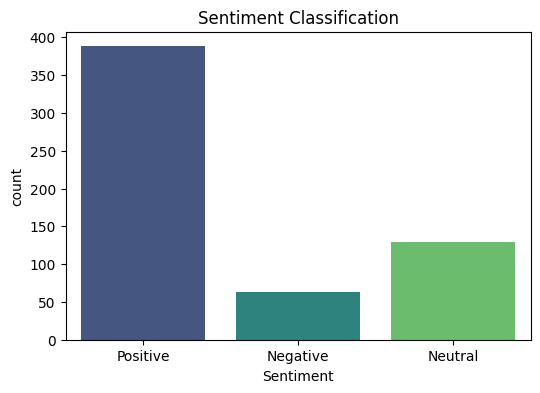

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette="viridis")
plt.title("Sentiment Classification")
plt.show()


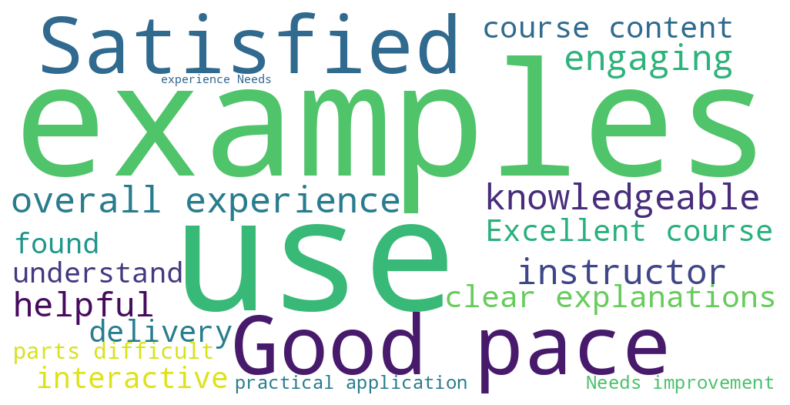

In [41]:
text = " ".join(df['Feedback'])

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


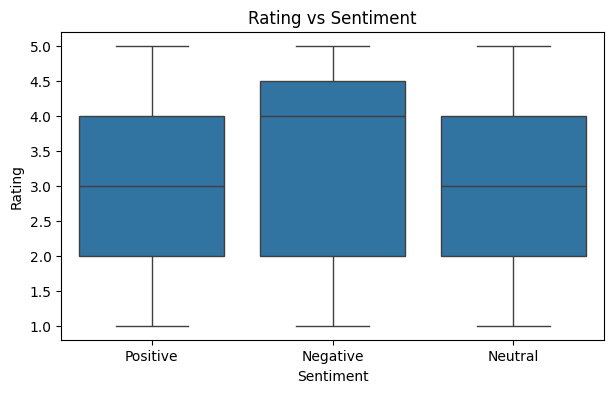

In [42]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title("Rating vs Sentiment")
plt.show()


In [43]:
avg_rating = df['Rating'].mean()
sentiment_counts = df['Sentiment'].value_counts()

print("📌 Average Rating:", avg_rating)
print("\n📌 Sentiment Counts:\n", sentiment_counts)

def suggestions(avg, sentiment_counts):
    print("\n🎯 **Event Improvement Suggestions**")
    if sentiment_counts.get("Negative", 0) > 5:
        print("- Many students expressed dissatisfaction — review logistics & engagement.")
    if avg < 3.5:
        print("- Improve content quality & interactivity.")
    if sentiment_counts.get("Positive", 0) > sentiment_counts.get("Negative", 0):
        print("- Overall student satisfaction is good, continue current efforts.")
    print("- Ask more open-ended questions for deeper insights.")

suggestions(avg_rating, sentiment_counts)


📌 Average Rating: 3.0

📌 Sentiment Counts:
 Sentiment
Positive    388
Neutral     129
Negative     63
Name: count, dtype: int64

🎯 **Event Improvement Suggestions**
- Many students expressed dissatisfaction — review logistics & engagement.
- Improve content quality & interactivity.
- Overall student satisfaction is good, continue current efforts.
- Ask more open-ended questions for deeper insights.


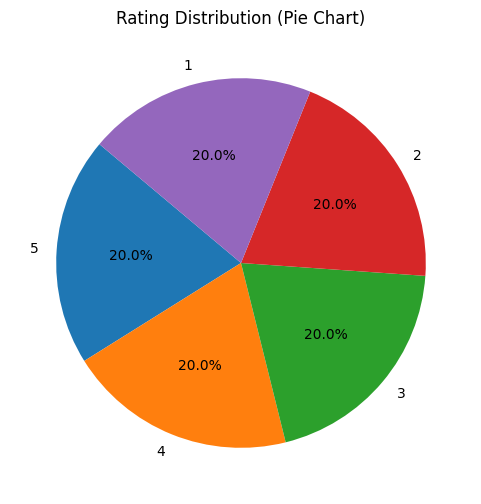

In [46]:
plt.figure(figsize=(6,6))
df['Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


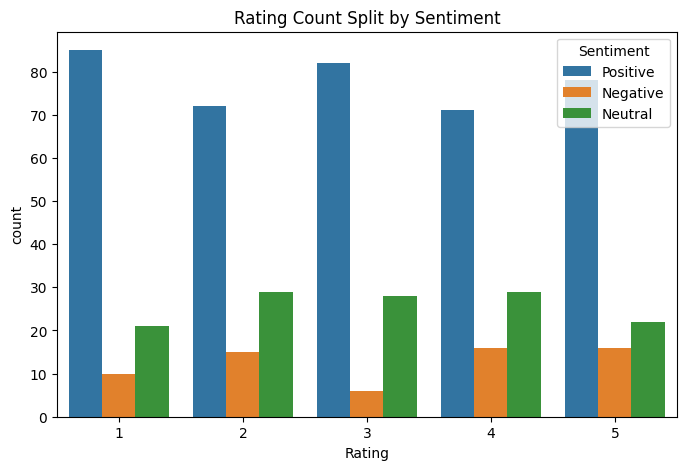

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x="Rating", hue="Sentiment", data=df)
plt.title("Rating Count Split by Sentiment")
plt.show()


In [49]:
if "Event" in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby("Event")['Rating'].mean().sort_values().plot(kind="bar")
    plt.title("Average Rating per Event")
    plt.ylabel("Average Rating")
    plt.show()


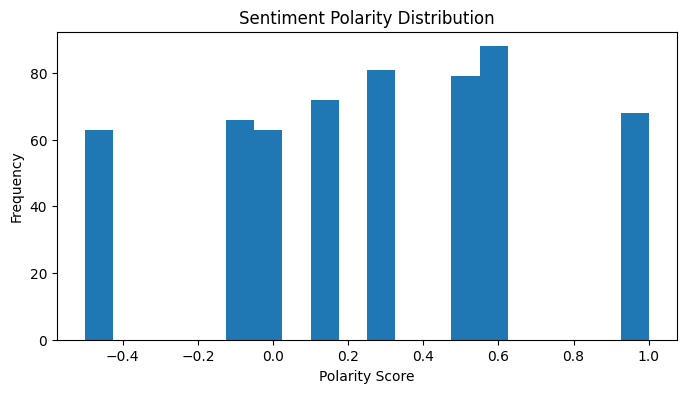

In [50]:
plt.figure(figsize=(8,4))
plt.hist(df['TextBlob_Polarity'], bins=20)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()


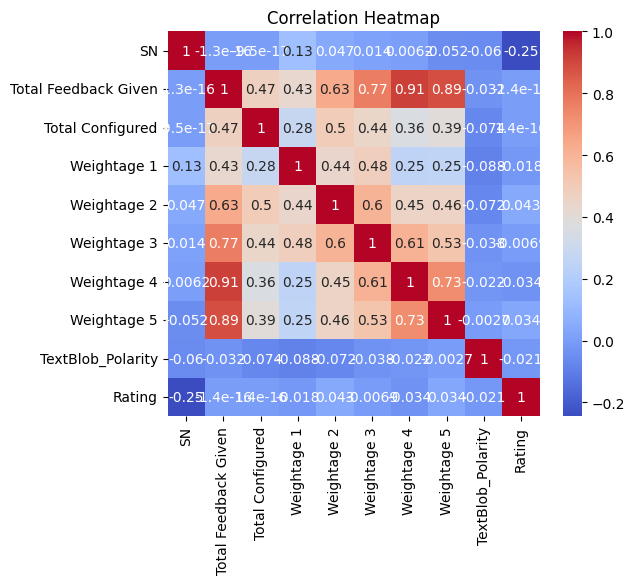

In [52]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

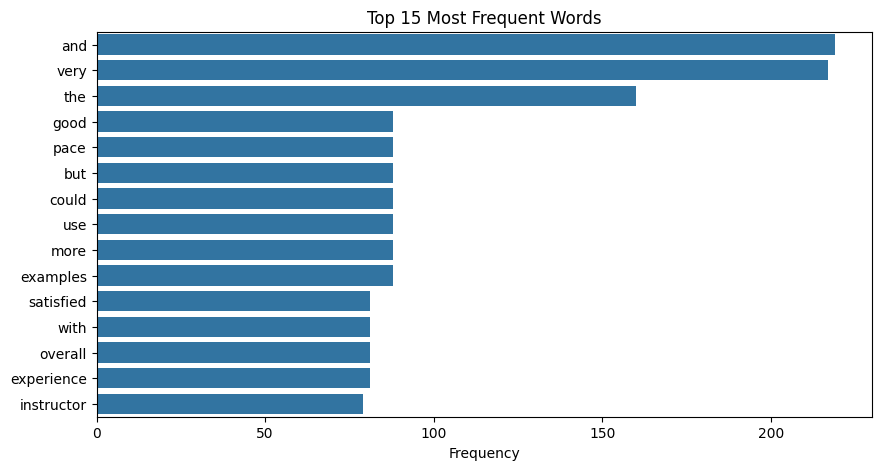

In [53]:
from collections import Counter
import string

def clean_text(text):
    text = text.lower()
    for p in string.punctuation:
        text = text.replace(p, "")
    return text

words = " ".join(df["Feedback"].apply(clean_text)).split()
word_counts = Counter(words).most_common(15)

words_list, freq_list = zip(*word_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(freq_list), y=list(words_list))
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Frequency")
plt.show()


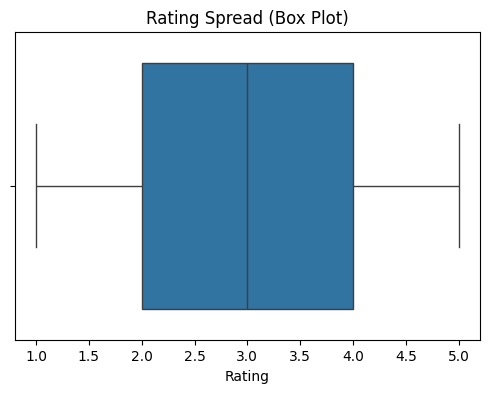

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Rating'])
plt.title("Rating Spread (Box Plot)")
plt.show()


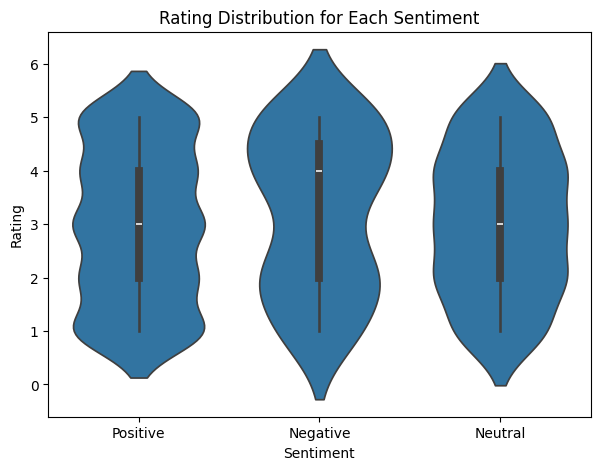

In [55]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Sentiment", y="Rating", data=df)
plt.title("Rating Distribution for Each Sentiment")
plt.show()


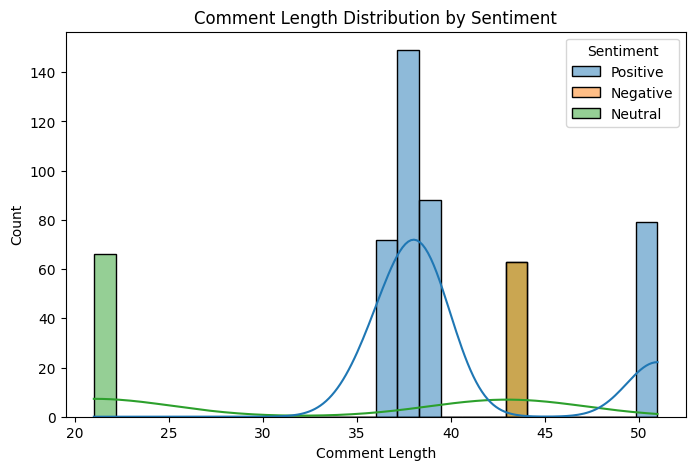

In [56]:
df["Comment Length"] = df["Feedback"].apply(lambda x: len(str(x)))

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Comment Length", hue="Sentiment", kde=True)
plt.title("Comment Length Distribution by Sentiment")
plt.show()


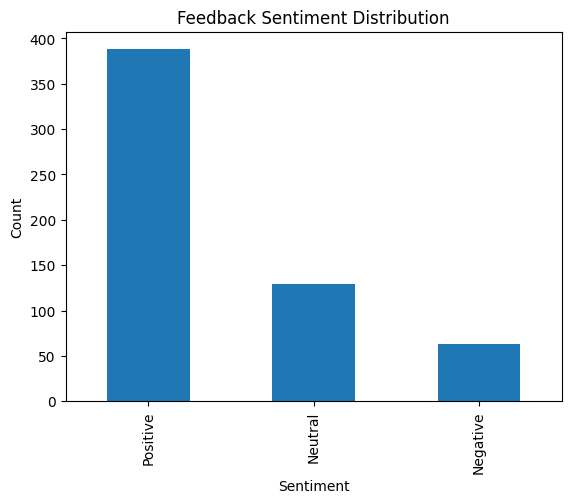

In [60]:
plt.figure()
df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Feedback Sentiment Distribution")
plt.show()


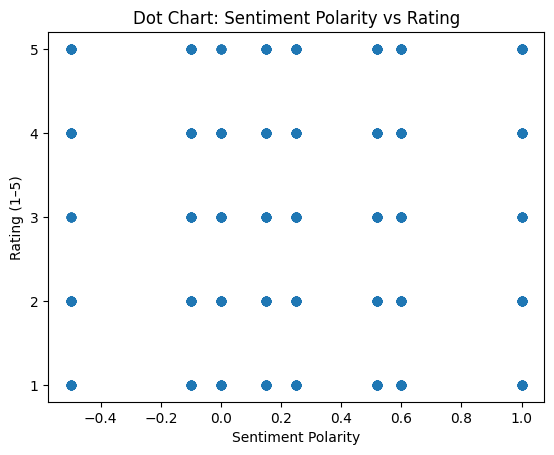

In [63]:
plt.figure()
plt.scatter(df['TextBlob_Polarity'], df['Rating'])
plt.xlabel("Sentiment Polarity")
plt.ylabel("Rating (1–5)")
plt.title("Dot Chart: Sentiment Polarity vs Rating")
plt.yticks([1, 2, 3, 4, 5])
plt.show()


In [64]:
df.to_csv("Processed_Student_Feedback.csv", index=False)
files.download("Processed_Student_Feedback.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>